In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv("data.csv")

In [73]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [119]:
df2=df.drop('Unnamed: 32',axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [120]:
df2.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


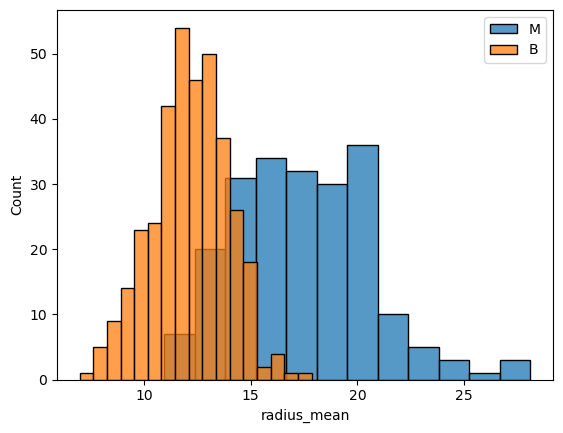

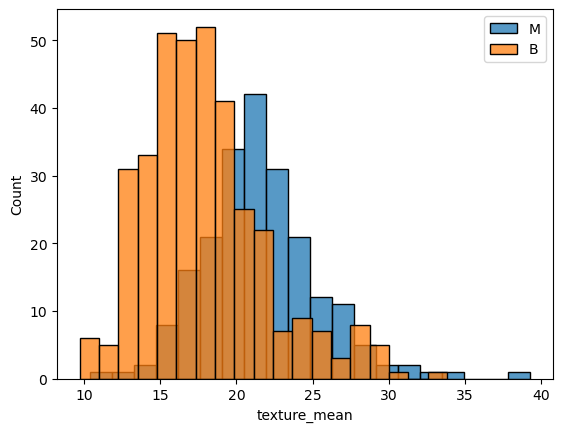

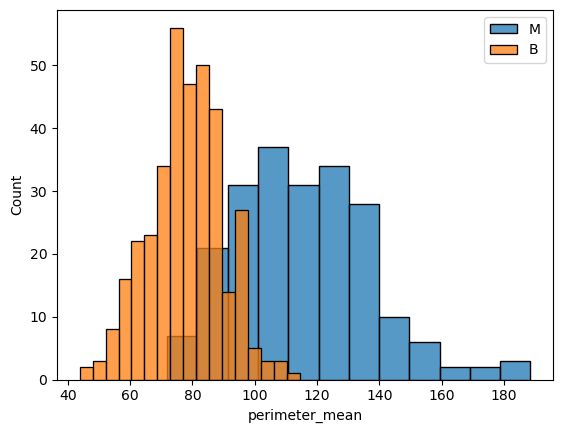

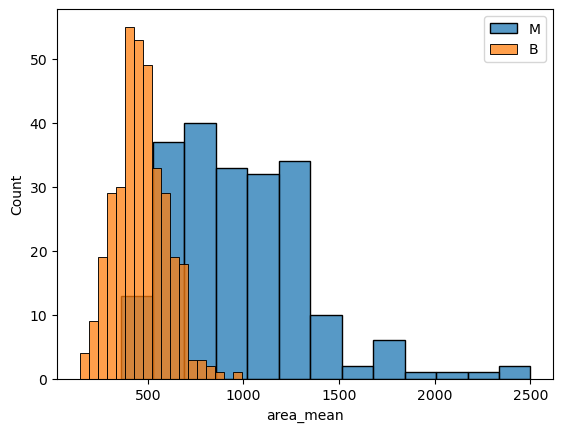

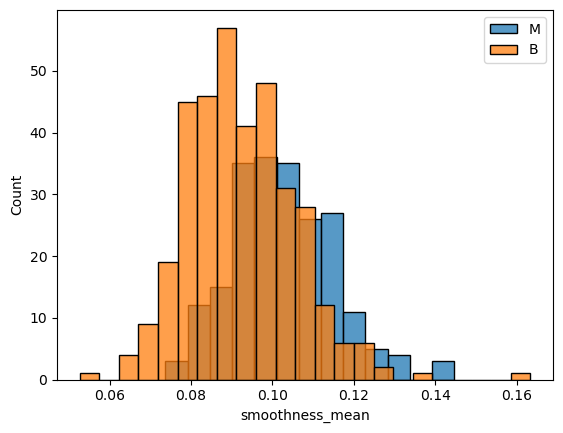

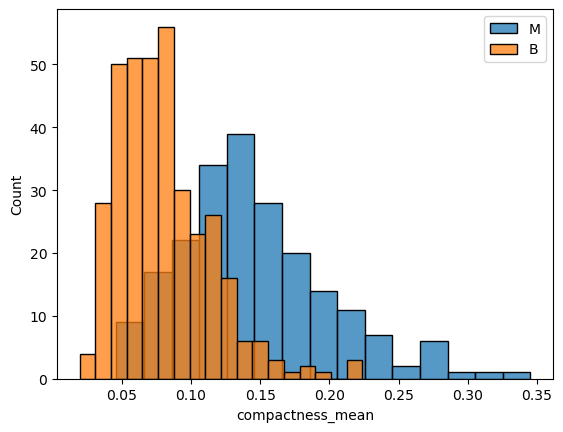

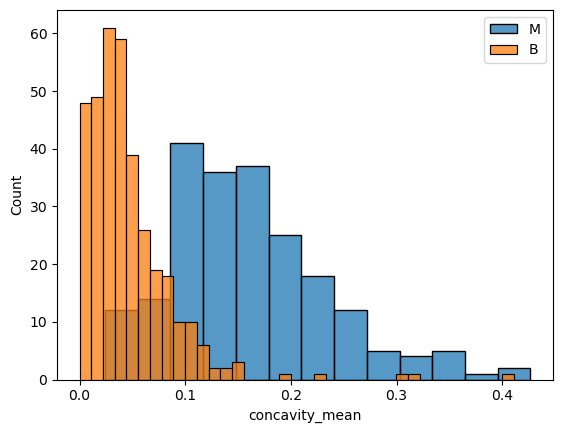

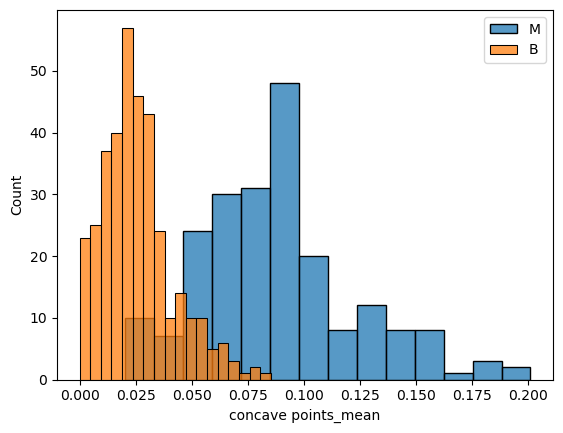

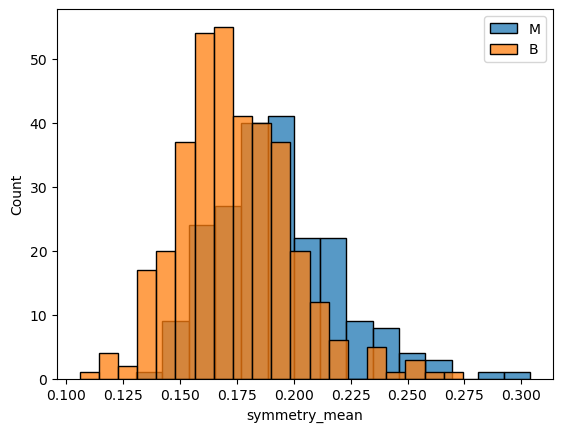

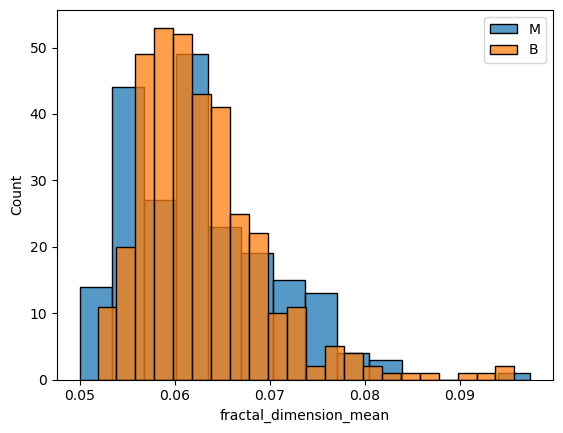

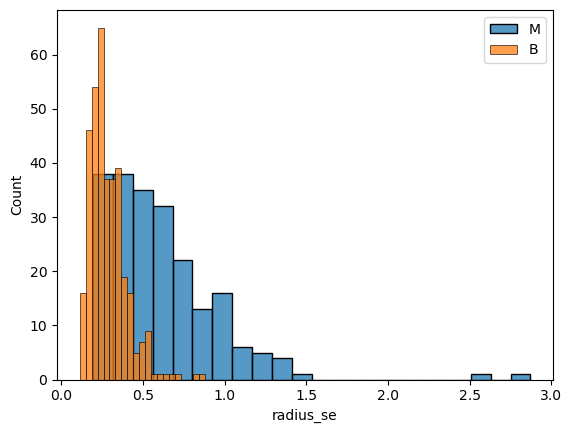

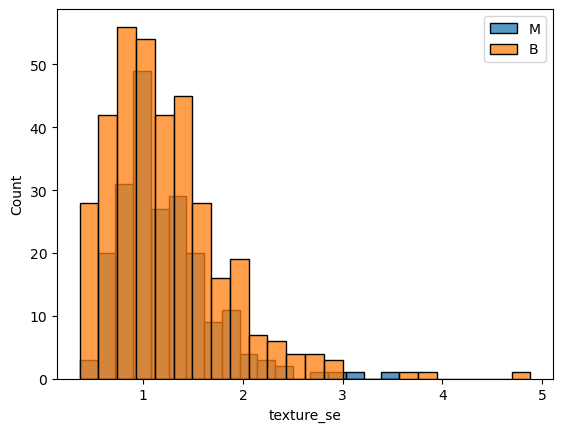

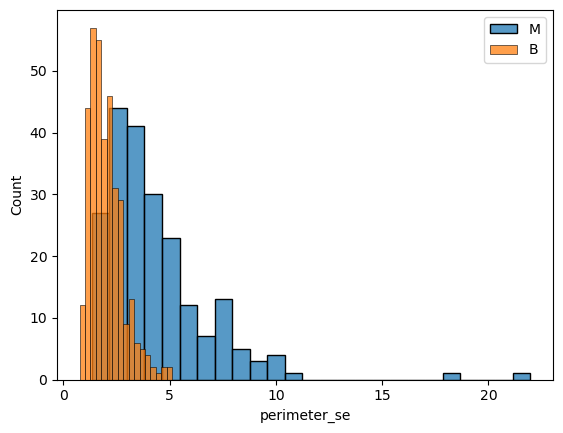

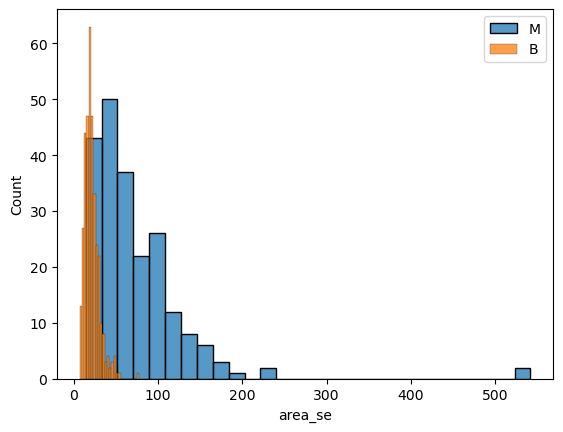

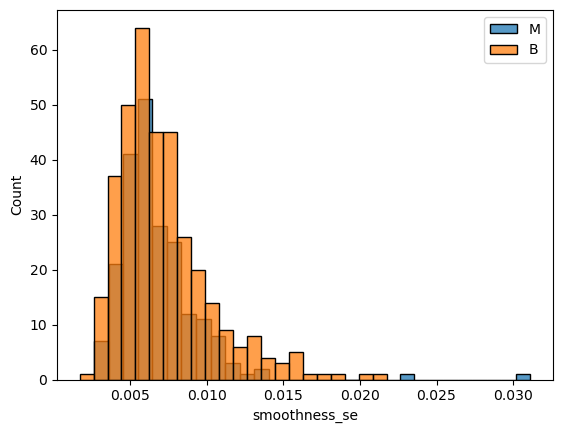

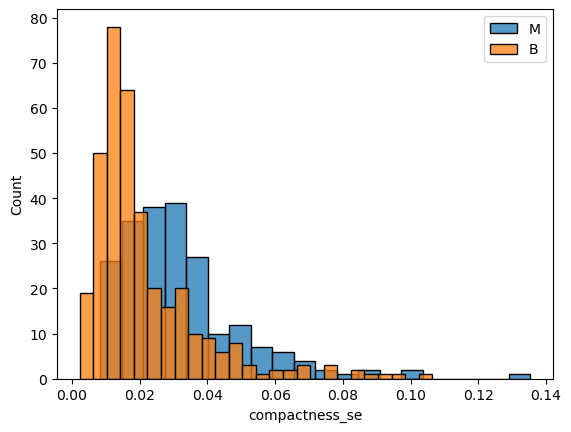

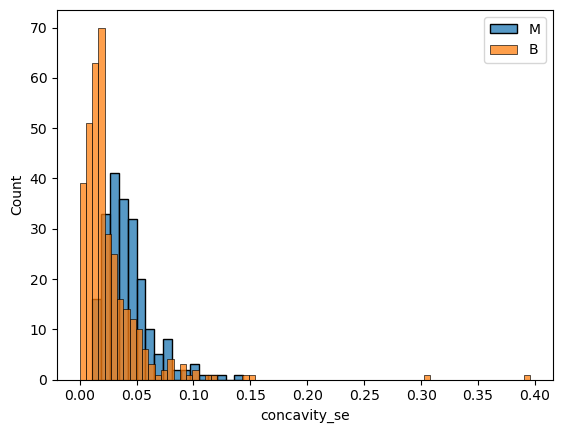

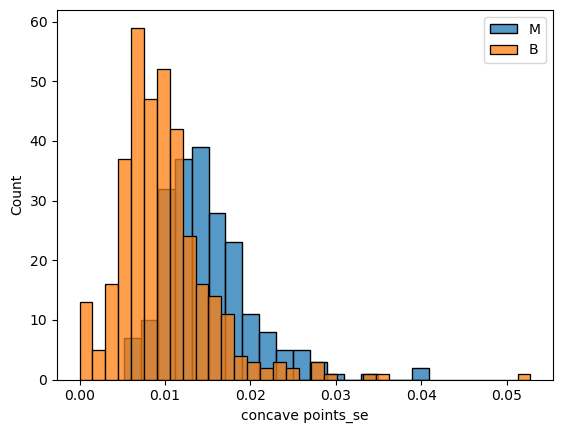

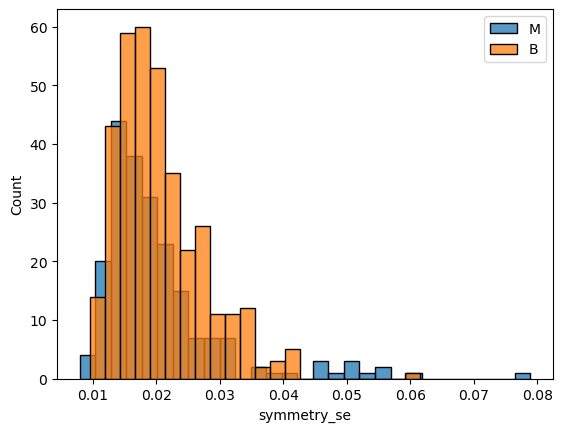

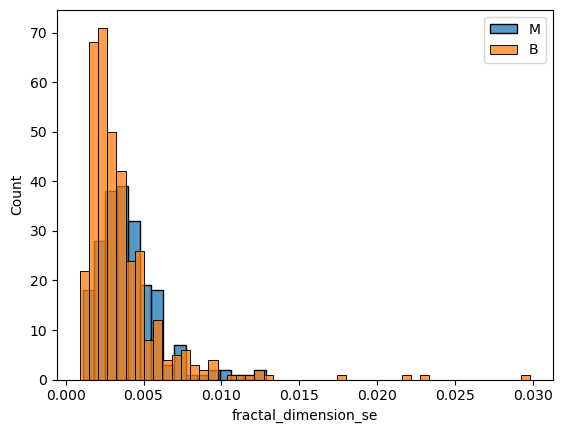

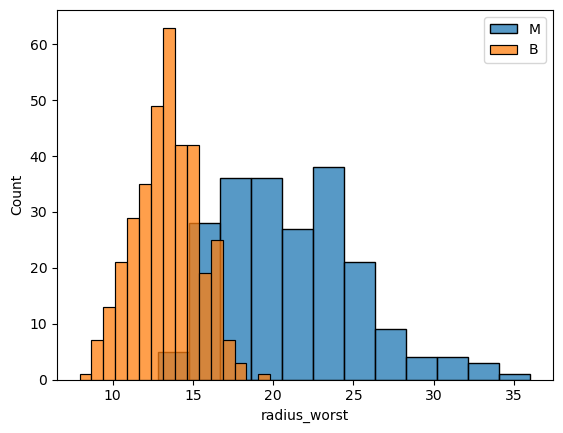

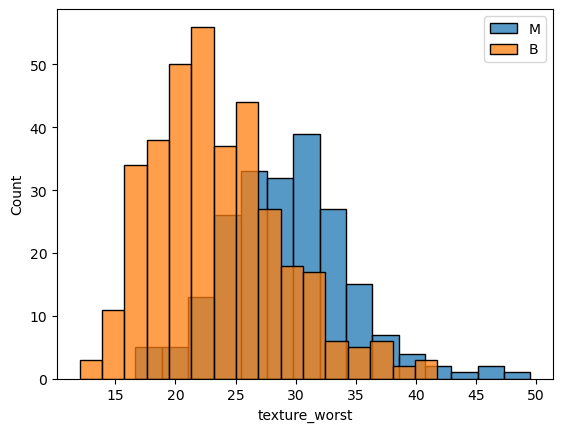

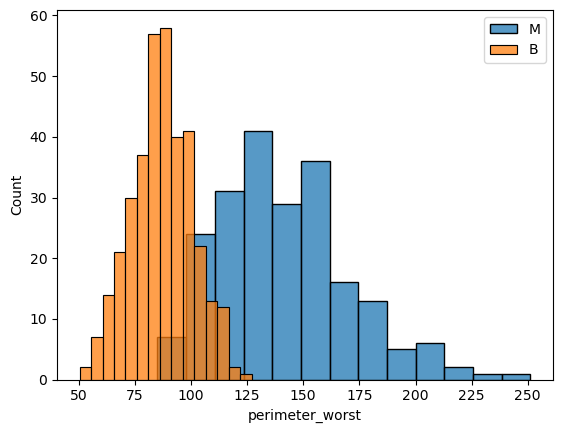

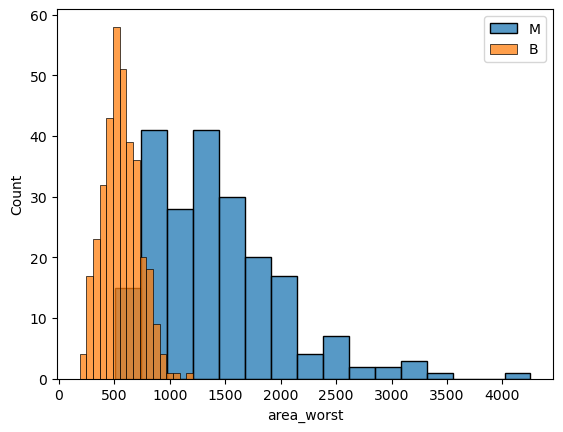

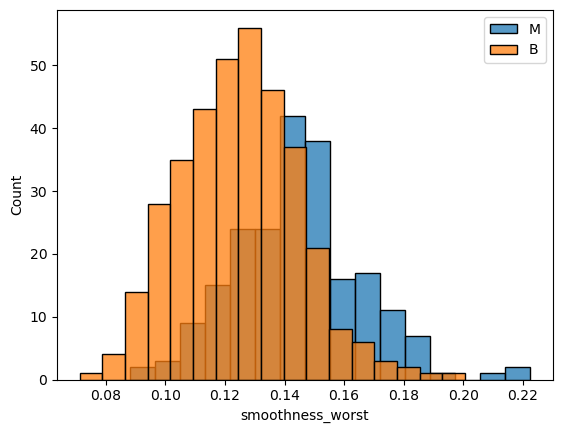

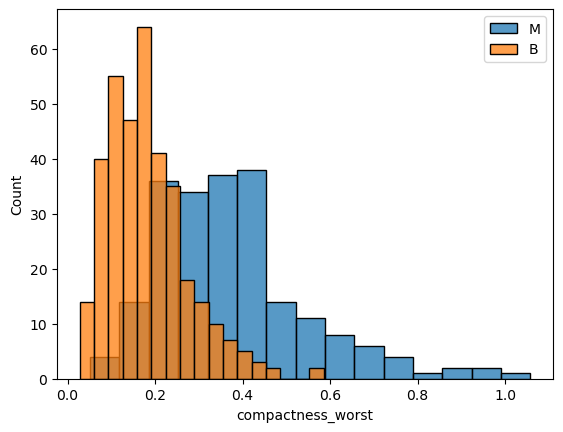

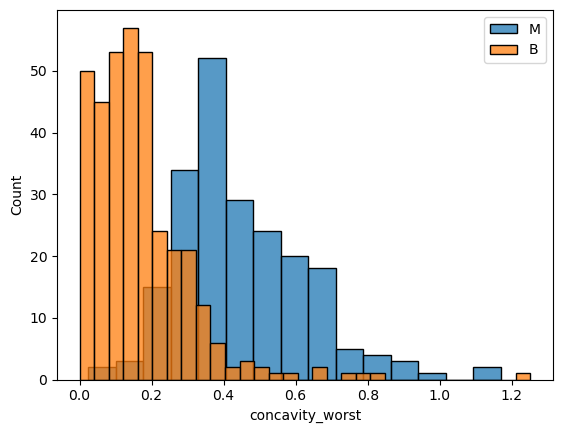

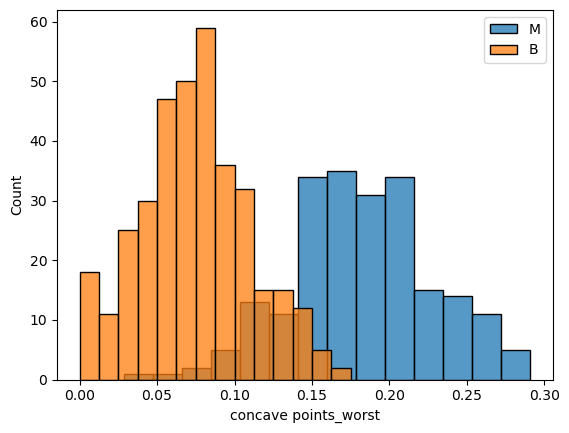

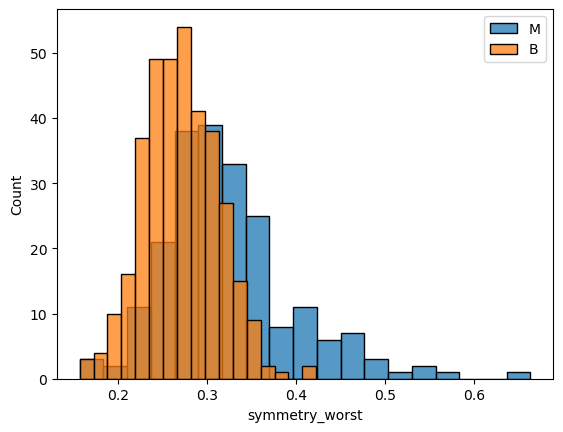

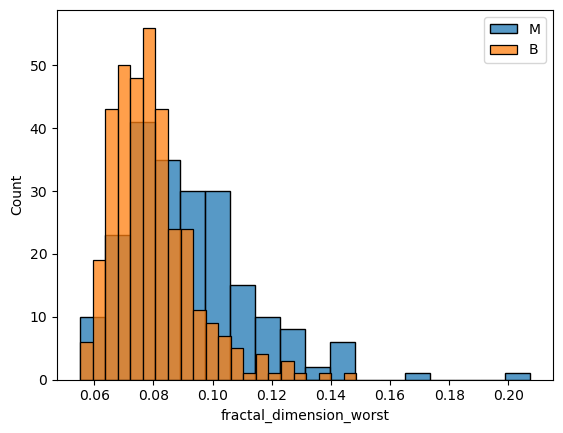

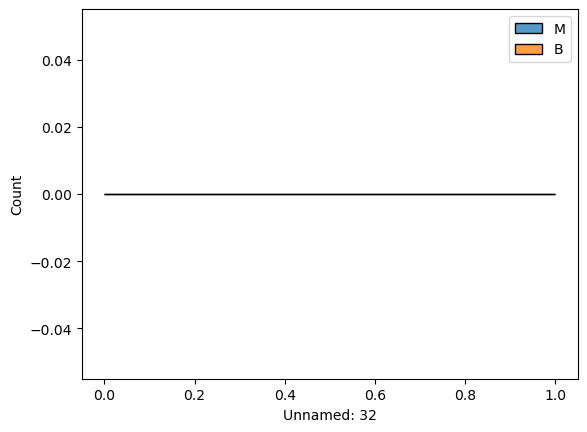

In [121]:
# Создание групп для цветов
groups = df2['diagnosis'].unique()
# Построение гистограмм и распределений для каждого признака
for column in df.columns[2:]:
    plt.figure()
    for group in groups:
        sns.histplot(data=df[df['diagnosis'] == group][column], label=group)
    plt.xlabel(column)
    plt.legend()
    plt.show()


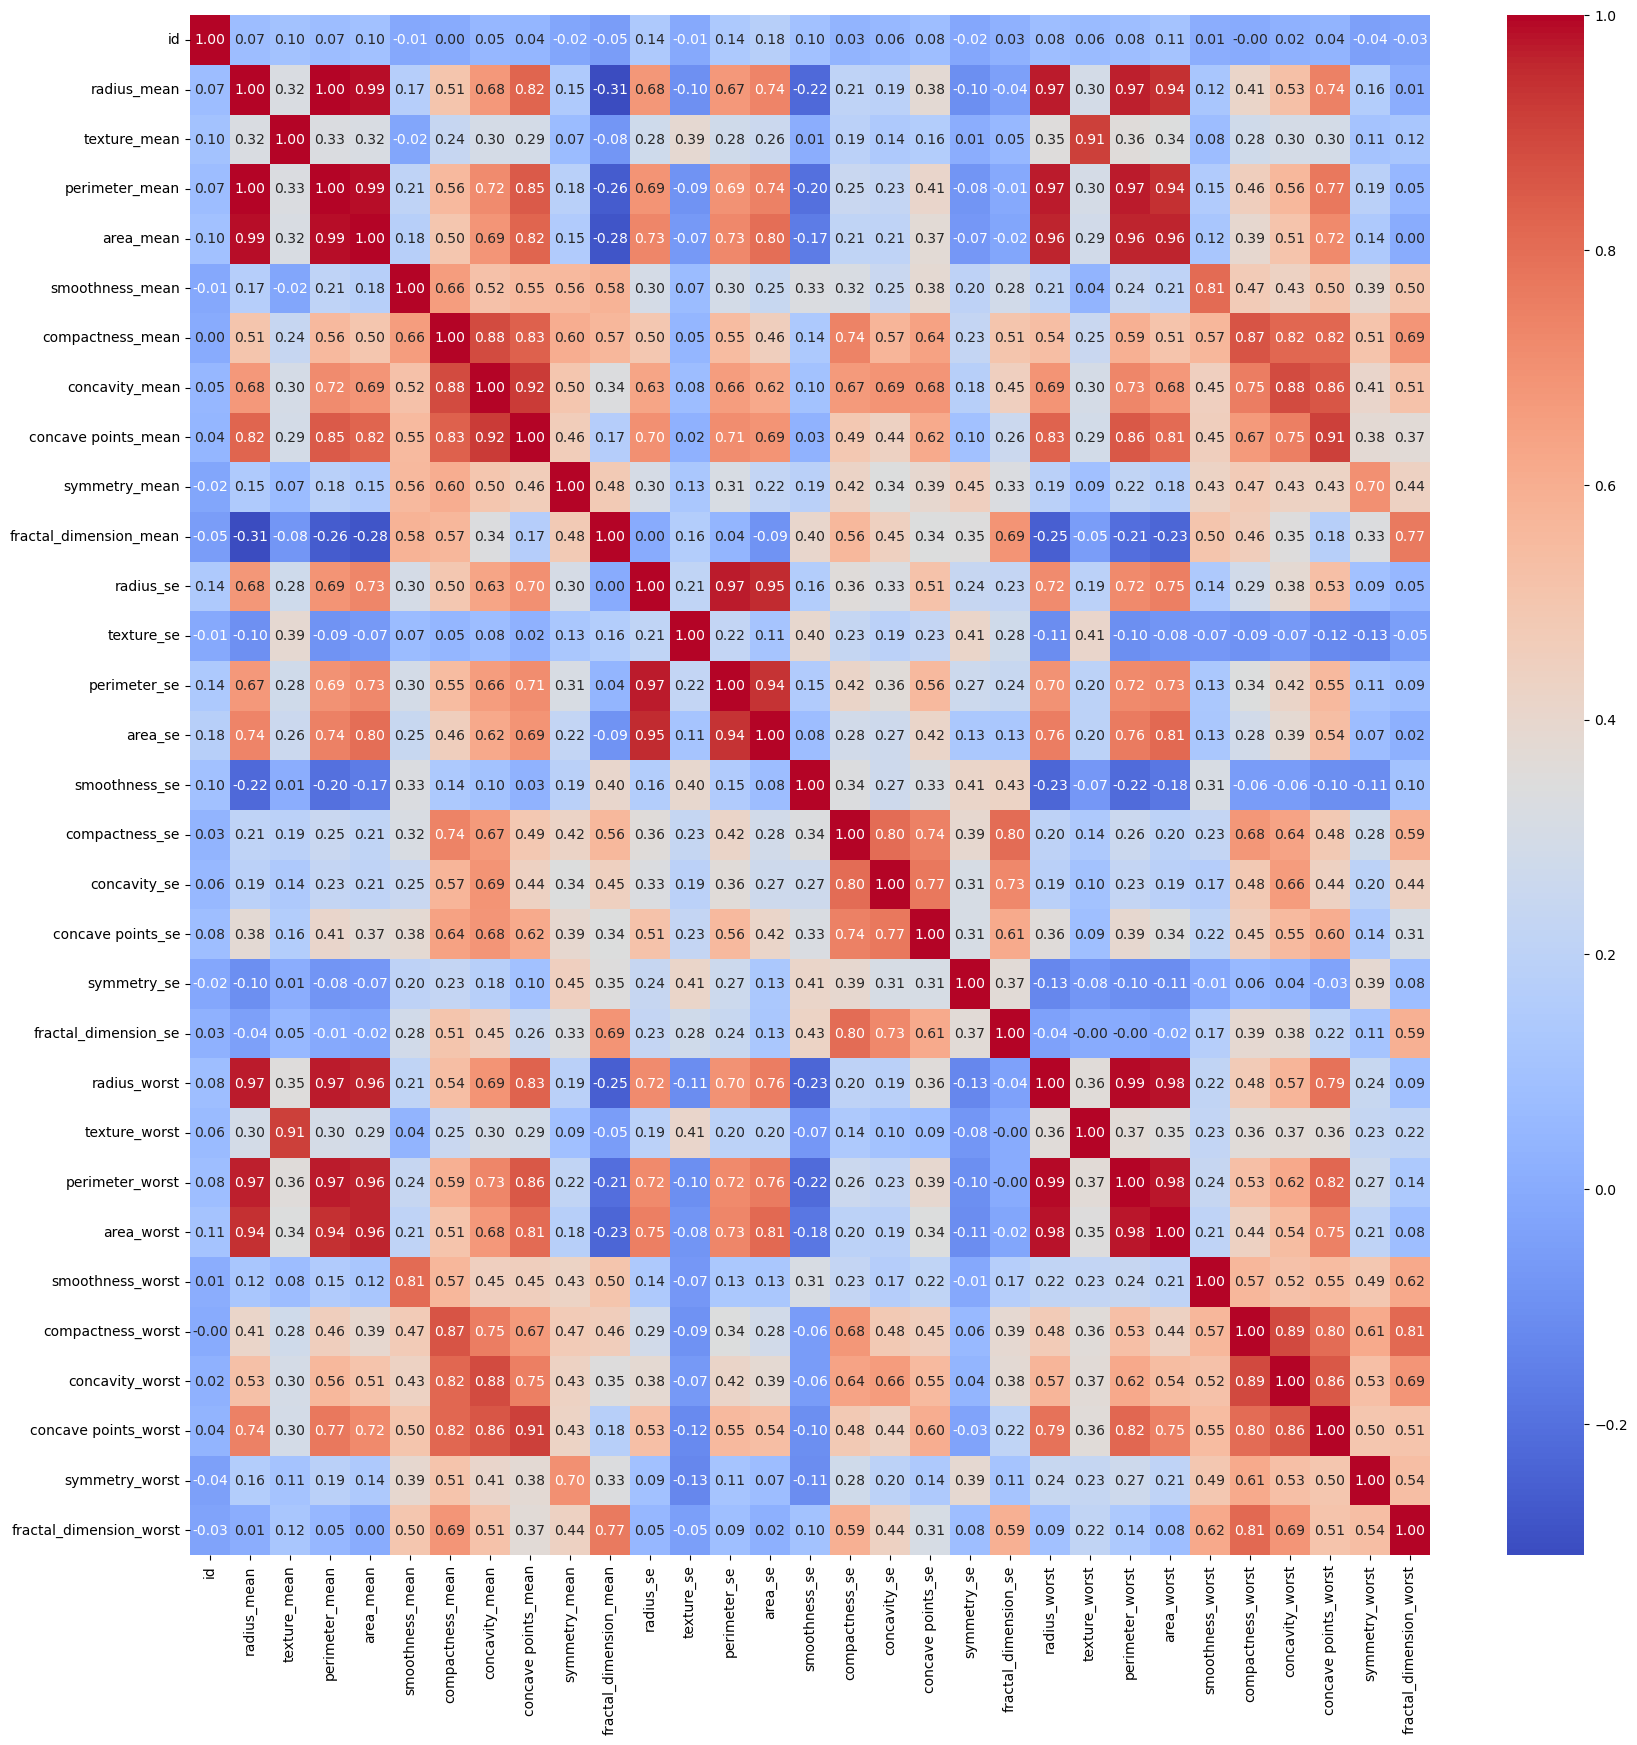

In [122]:
# Построение матрицы корреляций
correlation_matrix = df2.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix,fmt=".2f", annot=True, cmap='coolwarm')
plt.show()

In [77]:
#сильно скоррелированые признаки можно видеть на карте по цвету ближе к насщенно красному, например такие как:
#-radius_mean от perimeter_mean или от area_mean итд

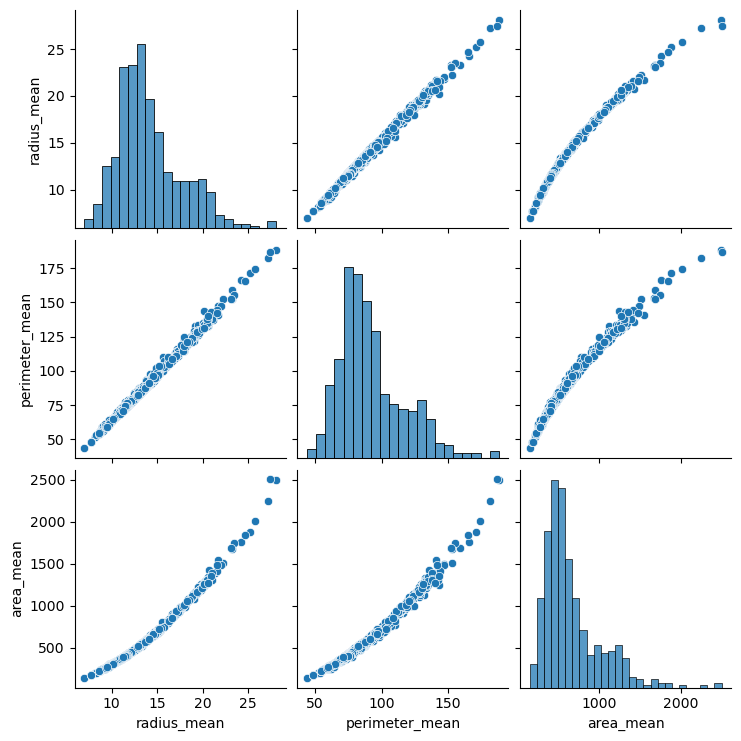

In [123]:
# Построение попарных scatterplot-ов
sns.pairplot(df2, vars=['radius_mean', 'perimeter_mean', 'area_mean'])
plt.show()
#Наблюдаем линейную зависимость

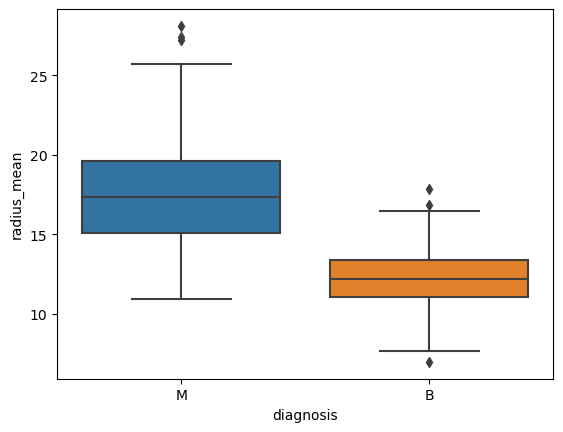

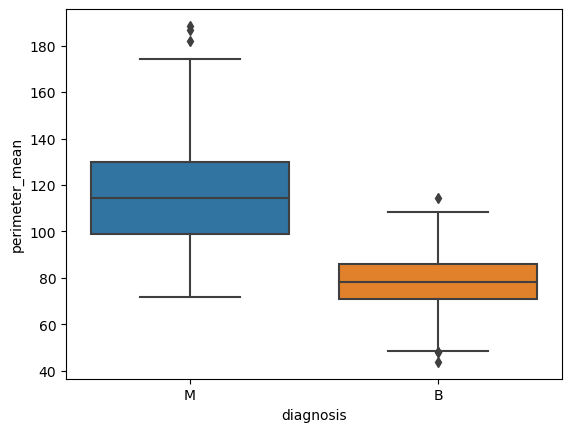

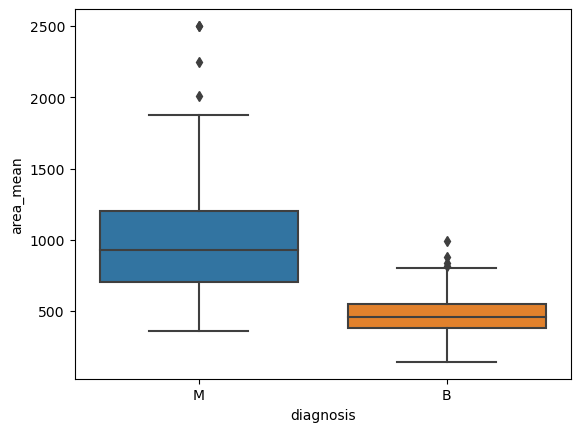

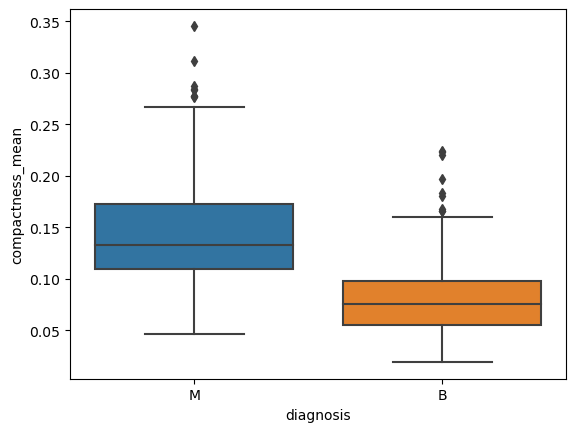

In [124]:
# Построение boxplots
features = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean']
for feature in features:
    plt.figure()
    sns.boxplot(x='diagnosis', y=feature, data=df2)
    plt.show()

In [125]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:, 2:], df2['diagnosis'], test_size=0.3, random_state=7777)

In [131]:
# Стандартизация переменных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Стандартизация нужна здесь, чтобы привести все признаки к одному масштабу и избежать проблемы, 
# когда один признак может иметь больший диапазон значений, чем другой. 
# Это важно для алгоритма kNN, который использует расстояние между точками для классификации.

In [135]:
# Построение модели kNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = knn.predict(X_test_scaled)

# Вычисление метрик качества
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC AUC score:", roc_auc)

Accuracy: 0.9473684210526315
Precision: 0.9666666666666667
Recall: 0.8923076923076924
F1 score: 0.928
ROC AUC score: 0.986066763425254


In [136]:
from sklearn.model_selection import GridSearchCV

# Задание параметров для поиска
params = {'n_neighbors': np.arange(1, 21)}

# Поиск наилучших параметров
grid_search = GridSearchCV(knn, params, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'n_neighbors': 3}


In [137]:
# Предсказание на тестовой выборке с настроенными параметрами
y_pred_tuned = grid_search.predict(X_test_scaled)

# Вычисление метрик качества с настроенными параметрами
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, pos_label='M')
recall_tuned = recall_score(y_test, y_pred_tuned, pos_label='M')
f1_tuned = f1_score(y_test, y_pred_tuned, pos_label='M')
roc_auc_tuned = roc_auc_score(y_test, grid_search.predict_proba(X_test_scaled)[:, 1])

print("Tuned accuracy:", accuracy_tuned)
print("Tuned precision:", precision_tuned)
print("Tuned recall:", recall_tuned)
print("Tuned F1 score:", f1_tuned)
print("Tuned ROC AUC score:", roc_auc_tuned)

Tuned accuracy: 0.9415204678362573
Tuned precision: 0.9661016949152542
Tuned recall: 0.8769230769230769
Tuned F1 score: 0.9193548387096773
Tuned ROC AUC score: 0.9654571843251089
